In [2]:
from pathlib import Path

from tqdm import tqdm
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Check the shape of the image 

(256, 1600, 3)
18 241


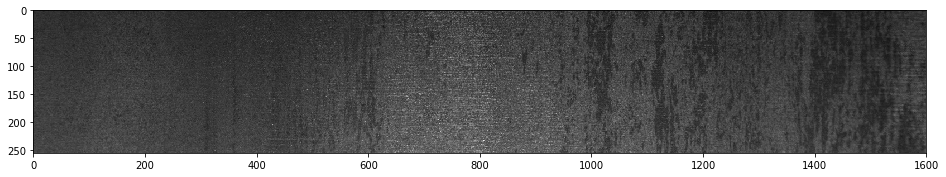

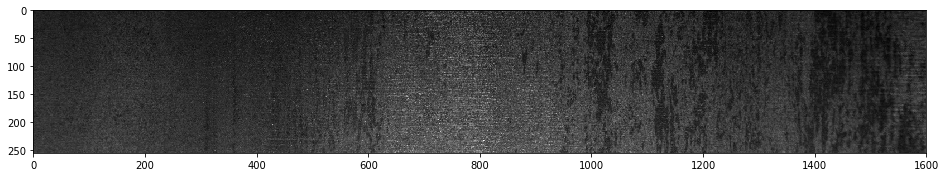

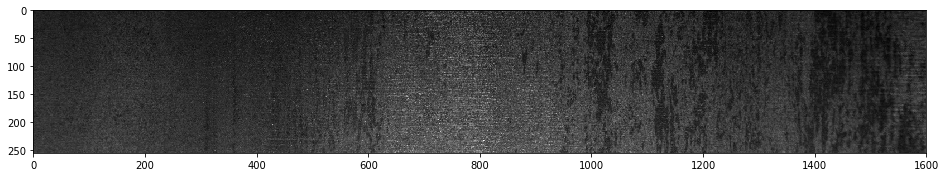

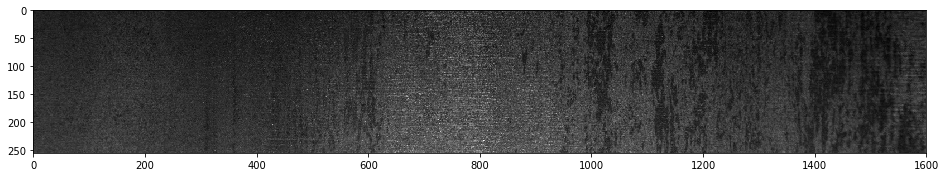

In [30]:
im = cv2.imread('/data2/datasets/kaggle/severstal-steel-defect-detection/raw/trainval/00ded7837.jpg')
print(im.shape)
print(im.min(), im.max())
plt.figure(figsize=(16, 10)); plt.imshow(im)
plt.figure(figsize=(16, 10)); plt.imshow(im[..., 0], cmap='gray')
plt.figure(figsize=(16, 10)); plt.imshow(im[..., 1], cmap='gray')
plt.figure(figsize=(16, 10)); plt.imshow(im[..., 2], cmap='gray')

## Get Image Paths
Including both **trainval** and **test**

In [12]:
dataset_dir = Path('/data2/datasets/kaggle/severstal-steel-defect-detection/raw')
im_paths = sorted(dataset_dir.rglob("*.jpg"))
print(f"{len(im_paths)} images found in total.")
print(f"{[str(p) for p in im_paths[:5]]}")

14369 images found in total.
['/data2/datasets/kaggle/severstal-steel-defect-detection/raw/test/004f40c73.jpg', '/data2/datasets/kaggle/severstal-steel-defect-detection/raw/test/006f39c41.jpg', '/data2/datasets/kaggle/severstal-steel-defect-detection/raw/test/00b7fb703.jpg', '/data2/datasets/kaggle/severstal-steel-defect-detection/raw/test/00bbcd9af.jpg', '/data2/datasets/kaggle/severstal-steel-defect-detection/raw/test/0108ce457.jpg']


## Check whether all 3 channels are identical

In [27]:
def identical(a, b):
    return (a == b).sum() == a.size == b.size

channel_identical_cnt = 0
for p in tqdm(im_paths):
    im = cv2.imread(str(p))
    if identical(im[..., 0], im[..., 1]) and identical(im[..., 2], im[..., 1]):
        channel_identical_cnt += 1

print(f"{channel_identical_cnt}/{len(im_paths)} are identical.")

100%|██████████| 14369/14369 [00:45<00:00, 312.78it/s]

14369/14369 are identical.


## Check How black is the margin

There're black margins in some of the images. We wanted to see how does those margins look like, so we can add similar margins in our online augmentation.

thresh == 30

100%|██████████| 14369/14369 [00:39<00:00, 367.42it/s]


Found 6398 images with black margin.


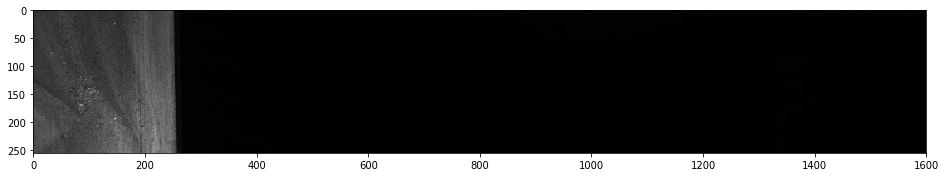

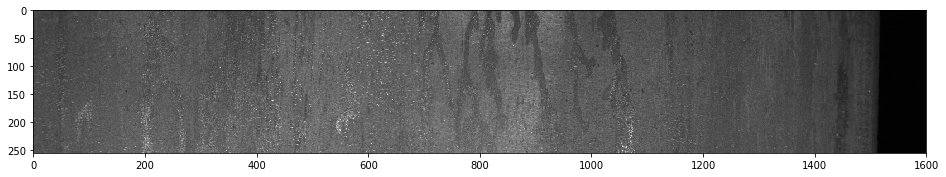

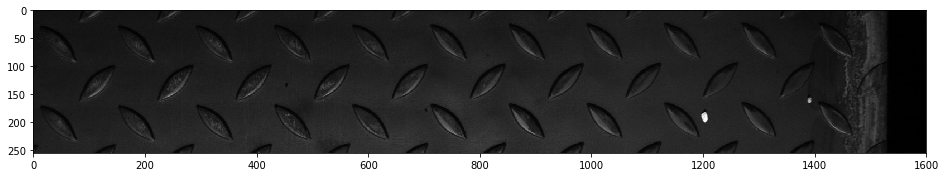

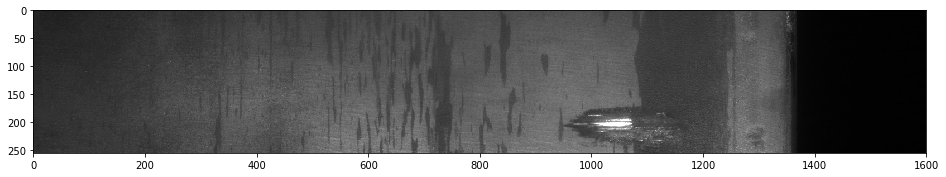

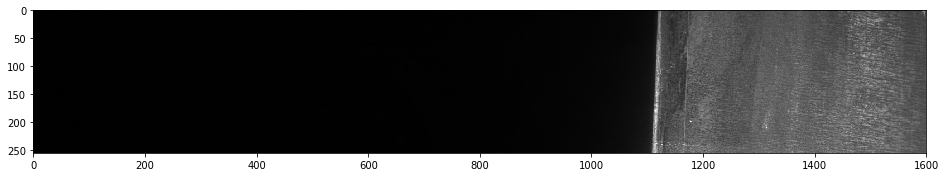

In [45]:
def contain_black_margin(im, thresh=30):
    im_grayscale = im[..., 0]
    im_grayscale[im_grayscale < thresh] = 0
    squashed_into_a_row = im_grayscale.sum(axis=0)
    row_nonzero = squashed_into_a_row.nonzero()[0]
    left, right = 0, im_grayscale.shape[1] - 1
    if len(row_nonzero) > 0:
        left, right = row_nonzero[0], row_nonzero[-1]
    if left > 0 or right < im_grayscale.shape[1] - 1:
        return True
    return False


im_paths_with_black_margin = [p for p in tqdm(im_paths) if contain_black_margin(cv2.imread(str(p)))]
print(f"Found {len(im_paths_with_black_margin)} images with black margin.")
for p in im_paths_with_black_margin[:5]:
    plt.figure(figsize=(16, 10)); plt.imshow(cv2.imread(str(p)))

## Check How Many Images Contain Both Black Margins



  8%|▊         | 1143/14369 [00:20<00:33, 390.63it/s]

Found 15 images with black margin.


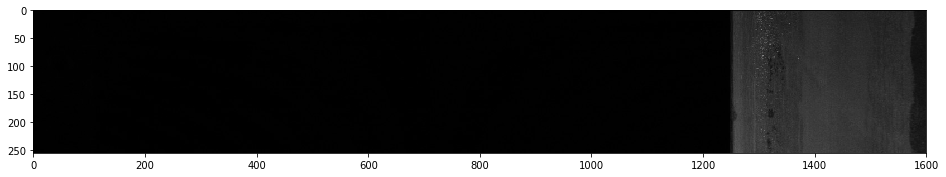

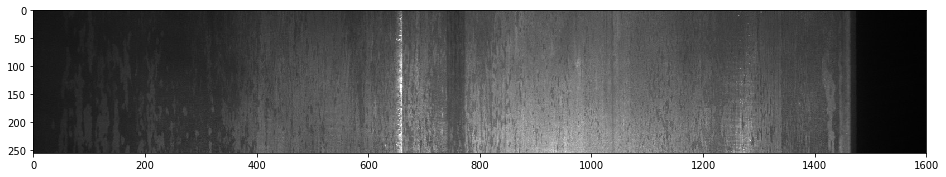

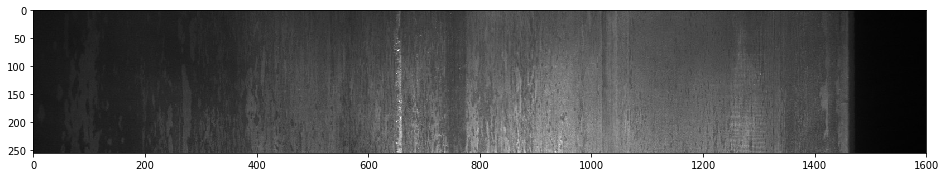

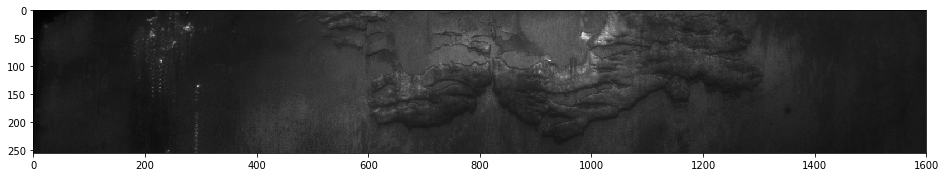

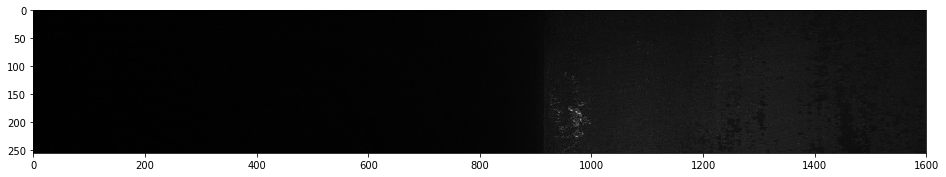

In [51]:
def contain_both_black_margin(im, thresh=30):
    im_grayscale = im[..., 0]
    im_grayscale[im_grayscale < thresh] = 0
    squashed_into_a_row = im_grayscale.sum(axis=0)
    row_nonzero = squashed_into_a_row.nonzero()[0]
    left, right = 0, im_grayscale.shape[1] - 1
    if len(row_nonzero) > 0:
        left, right = row_nonzero[0], row_nonzero[-1]
    if left > 0 and right < im_grayscale.shape[1] - 1:
        return True
    return False


im_paths_with_both_black_margins = [p for p in im_paths if contain_both_black_margin(cv2.imread(str(p)))]
print(f"Found {len(im_paths_with_both_black_margins)} images with black margin.")
for p in im_paths_with_both_black_margins[:5]:
    plt.figure(figsize=(16, 10)); plt.imshow(cv2.imread(str(p)))